# Updated code for sereis 4


In [1]:
sde_convstrong()

NameError: name 'sde_convstrong' is not defined

### Strong rate of convergence

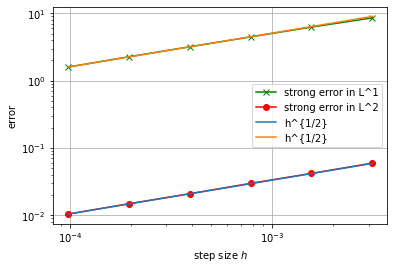

Strong rate of convergence error in L_1: 0.5027275986137517
Strong rate of convergence error in L_2: 0.48644915022341156
Elapsed time: 1.284109354019165


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from time import time

def sde_convstrong():
    N0 = 10
    L = 5
    M = 10**4

    T = 1
    x0 = 1
    f = lambda x, t: -np.sin(x) * (np.cos(x))**3
    g = lambda x, t: np.cos(x)**2

    NL = N0 * 2**L
    B = brownp(T, NL, M)
    YT = np.zeros((L+1, M))

    start_time = time()

    for l in range(L+1):
        N = N0 * 2**l
        p = 2**(L-l)
        h = T / N
        Y = np.zeros((N+1, M))
        Y[0, :] = x0

        for j in range(1, N+1):
            dB = B[j*p, :] - B[(j-1)*p, :]
            t = j * h
            x = Y[j-1, :]
            Y[j, :] = x + f(x, t) * h + g(x, t) * dB

        YT[l, :] = Y[N, :]

    exact = np.arctan(B[-1, :] + np.tan(x0))
    YTe = np.abs(YT - np.tile(exact, (L+1, 1)))
    YTem = np.mean(YTe, axis=1)
    YTem2 = np.sqrt(np.sum(YTe**2, axis=1))

    Lp = L
    hv = T / (N * 2 ** np.arange(0, Lp+1))
    hL = hv[-1]
    p = hv[0] / hL

    plt.loglog(hv, YTem2, '-gx', hv, YTem, '-ro', hL * np.array([1, p]), YTem[-1] * np.array([1, p**0.5]), hL * np.array([1, p]), YTem2[-1] * np.array([1, p**0.5]))
    plt.legend(['strong error in L^1', 'strong error in L^2', 'h^{1/2}', 'h^{1/2}'])
    plt.grid(True)
    plt.xlabel('step size $h$')
    plt.ylabel('error')
    plt.show()

    slope, _, _, _, _ = linregress(np.log(hv), np.log(YTem))
    print('Strong rate of convergence error in L_1:', slope)

    slope, _, _, _, _ = linregress(np.log(hv), np.log(YTem2))
    print('Strong rate of convergence error in L_2:', slope)

    elapsed_time = time() - start_time
    print('Elapsed time:', elapsed_time)

sde_convstrong()


### sde_convstrongmil

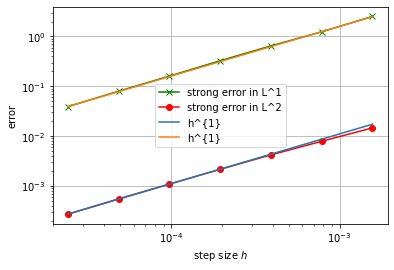

Strong rate of convergence: 0.9601161290773547
Elapsed time: 3.6961100101470947


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from time import time

def sde_convstrongmil():
    N0 = 10
    L = 6
    M = 10**4

    T = 1
    x0 = 1
    f = lambda x, t: -np.sin(x) * (np.cos(x))**3
    g = lambda x, t: np.cos(x)**2
    hfu = lambda x, t: 2 * np.cos(x)**3 * (-np.sin(x))

    NL = N0 * 2**L
    B = brownp(T, NL, M)
    YT = np.zeros((L+1, M))

    start_time = time()

    for l in range(L+1):
        N = N0 * 2**l
        p = 2**(L-l)
        h = T / N
        Y = np.zeros((N+1, M))
        Y[0, :] = x0

        for j in range(1, N+1):
            dB = B[j*p, :] - B[(j-1)*p, :]
            t = j * h
            x = Y[j-1, :]
            Y[j, :] = x + f(x, t) * h + g(x, t) * dB
            Y[j, :] = x + f(x, t) * h + g(x, t) * dB + 0.5 * hfu(x, t) * (dB**2 - h)

        YT[l, :] = Y[N, :]

    exact = np.arctan(B[-1, :] + np.tan(x0))
    YTe = np.abs(YT - np.tile(exact, (L+1, 1)))
    YTem = np.mean(YTe, axis=1)
    YTem2 = np.sqrt(np.sum(YTe**2, axis=1))

    Lp = L
    hv = T / (N * 2 ** np.arange(0, Lp+1))
    hL = hv[-1]
    p = hv[0] / hL

    plt.loglog(hv, YTem2, '-gx', hv, YTem, '-ro', hL * np.array([1, p]), YTem[-1] * np.array([1, p**1]), hL * np.array([1, p]), YTem2[-1] * np.array([1, p**1]))
    plt.legend(['strong error in L^1', 'strong error in L^2', 'h^{1}', 'h^{1}'])
    plt.grid(True)
    plt.xlabel('step size $h$')
    plt.ylabel('error')
    plt.show()

    slope, _, _, _, _ = linregress(np.log(hv), np.log(YTem))
    print('Strong rate of convergence:', slope)

    elapsed_time = time() - start_time
    print('Elapsed time:', elapsed_time)

sde_convstrongmil()


### Weak Convergence

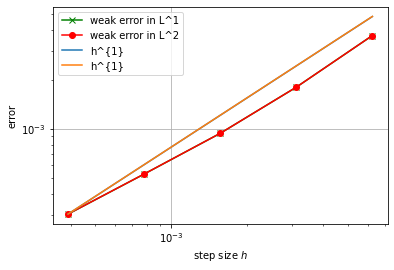

Weak rate of convergence L^2: 0.8986608186439808
Weak rate of convergence L^1: 0.8989987525050417
Elapsed time: 20.01435685157776


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from time import time

def sde_convweak():
    N0 = 10
    L = 4
    M = 5 * 10**4
    itera = 10

    T = 1
    x0 = 1
    f = lambda x, t: -np.sin(x) * (np.cos(x))**3
    g = lambda x, t: np.cos(x)**2
    G = lambda x: np.maximum(x - 1.1, 0)

    NL = N0 * 2**L
    B = brownp(T, NL, M)
    YT = np.zeros((L+1, M))
    Erro1 = np.zeros((L+1, 1))
    Erro2 = np.zeros((L+1, 1))

    start_time = time()

    for it in range(itera):
        for l in range(L+1):
            N = N0 * 2**l
            p = 2**(L-l)
            h = T / N
            Y = np.zeros((N+1, M))
            Y[0, :] = x0

            for j in range(1, N+1):
                dB = B[j*p, :] - B[(j-1)*p, :]
                t = j * h
                x = Y[j-1, :]
                Y[j, :] = x + f(x, t) * h + g(x, t) * dB

            YT[l, :] = Y[N, :]

        Z = G(YT)

        Ym = np.mean(Z, axis=1)
        Ymex = np.mean(G(np.arctan(np.random.randn(1, int(1e7)) * np.sqrt(T) + np.tan(x0))))
        Yme = np.abs(Ym - Ymex)
        Erro1 += Yme.reshape(-1, 1)
        Erro2 += (Yme**2).reshape(-1, 1)

    Erro1 /= itera
    Erro2 = np.sqrt(Erro2 / itera)
    Lp = L

    hv = T / (N * 2 ** np.arange(0, Lp+1))
    hL = hv[-1]
    p = hv[0] / hL

    plt.loglog(hv, Erro1, '-gx', hv, Erro2, '-ro', hL * np.array([1, p]), Erro1[-1] * np.array([1, p**1.0]), hL * np.array([1, p]), Erro2[-1] * np.array([1, p**1.0]))
    plt.legend(['weak error in L^1', 'weak error in L^2', 'h^{1}', 'h^{1}'])
    plt.grid(True)
    plt.xlabel('step size $h$')
    plt.ylabel('error')
    plt.show()

    slope, _, _, _, _ = linregress(np.log(hv), np.log(Erro2.flatten()))
    print('Weak rate of convergence L^2:', slope)

    slope, _, _, _, _ = linregress(np.log(hv), np.log(Erro1.flatten()))
    print('Weak rate of convergence L^1:', slope)

    elapsed_time = time() - start_time
    print('Elapsed time:', elapsed_time)

sde_convweak()


### SDE Heston_2

CLT confidence interval
[[3.18773652 3.31315869]
 [3.17065225 3.29326694]
 [3.1541141  3.27544743]
 [3.14619422 3.26697336]
 [3.14340939 3.26392102]
 [3.14149489 3.2618909 ]]


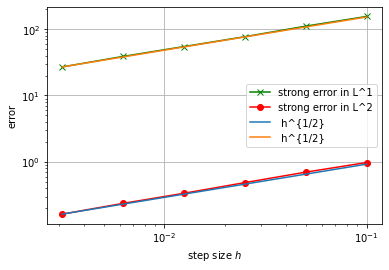

Elapsed time: 5.292753458023071


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

def sde_heston2():
    N0 = 10
    L = 5
    M = 10**4
    T = 1
    x0 = 10
    v0 = 0.5
    extra = 3
    xi = 0.25
    theta = 0.5
    r = 0.05
    kappa = 2
    G = lambda x: np.maximum(11 - x, 0)

    start_time = time()

    Le = L + extra
    Ne = N0 * 2**Le
    BI = brownp(T, Ne, M)
    BII = brownp(T, Ne, M)
    YT = np.zeros((L + 2, M))

    Lv = np.arange(0, L + 1).tolist() + [Le]

    for l in range(L + 2):
        le = Lv[l]
        N = N0 * 2**le
        p = 2**(Le - le)
        h = T / N
        x = x0
        v = v0

        for j in range(1, N + 1):
            dBI = BI[j * p, :] - BI[(j - 1) * p, :]
            dBII = BII[j * p, :] - BII[(j - 1) * p, :]
            x = x + r * x * h + (abs(v)**0.5) * x * dBI
            v = v + kappa * (theta - v) * h + xi * (abs(v)**0.5) * dBII

        YT[l, :] = x

    Ys = G(YT)
    YTe = np.abs(YT[:L+1, :] - YT[L+1, :][None, :])
    YTem = np.mean(YTe, axis=1)
    YTem2 = np.sqrt(np.sum(YTe**2, axis=1))
    Ym = np.mean(Ys, axis=1)
    est_var = np.var(Ys[:L+1, :], axis=1, ddof=1)

    AM = Ym[:L+1] - 1.96 * np.sqrt(est_var / M)
    BM = Ym[:L+1] + 1.96 * np.sqrt(est_var / M)
    hv = T / (N0 * 2**np.arange(0, L+1))
    hL = hv[-1]
    p = hv[0] / hL

    print('CLT confidence interval')
    print(np.column_stack((AM, BM)))

    plt.loglog(hv, YTem2, '-gx', hv, YTem, '-ro', hL * np.array([1, p]), YTem[-1] * np.array([1, p**0.5]), hL * np.array([1, p]), YTem2[-1] * np.array([1, p**0.5]))
    plt.legend(['strong error in L^1', 'strong error in L^2', ' h^{1/2}', ' h^{1/2}'])
    plt.grid(True)
    plt.xlabel('step size $h$')
    plt.ylabel('error')
    plt.show()

    elapsed_time = time() - start_time
    print('Elapsed time:', elapsed_time)

sde_heston2()
